## Regresión Lineal

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Cargar datos
data = pd.read_csv('data/cleaned_data.csv')  # Reemplaza 'tu_archivo.csv'



In [29]:
# --- Regresión Lineal para cpu_cores ---

# 2. Seleccionar la variable objetivo y las predictoras para cpu_cores
X_cpu = data[['memory_gbs','num_gpu', 'total_usage']]  # variables predictoras 
y_cpu = data['cpu_cores']

# 3. Preprocesamiento para cpu_cores
scaler_cpu = StandardScaler()
X_cpu_scaled = scaler_cpu.fit_transform(X_cpu)

# 4. Dividir los datos en conjuntos de entrenamiento y prueba para cpu_cores
X_cpu_train, X_cpu_test, y_cpu_train, y_cpu_test = train_test_split(X_cpu_scaled, y_cpu, test_size=0.2, random_state=42)  # 80/20 split

# 5. Crear y entrenar el modelo de Regresión Lineal para cpu_cores
model_cpu = LinearRegression()
model_cpu.fit(X_cpu_train, y_cpu_train)

# 6. Hacer predicciones para cpu_cores
y_cpu_pred = model_cpu.predict(X_cpu_test)

# 7. Evaluar el modelo para cpu_cores
mse_cpu = mean_squared_error(y_cpu_test, y_cpu_pred)
r2_cpu = r2_score(y_cpu_test, y_cpu_pred)

print("--- Resultados Regresión Lineal para cpu_cores ---")
print(f"Error Cuadrático Medio (MSE): {mse_cpu}")
print(f"R^2: {r2_cpu}")


--- Resultados Regresión Lineal para cpu_cores ---
Error Cuadrático Medio (MSE): 0.021741418027092937
R^2: 0.9998085566022643


In [30]:

# --- Regresión Lineal para memory_gbs ---

# 8. Seleccionar la variable objetivo y las predictoras para memory_gbs
X_mem = data[['cpu_cores','num_gpu', 'total_usage']]  # Elige las variables predictoras que quieras usar
y_mem = data['memory_gbs']

# 9. Preprocesamiento para memory_gbs 
scaler_mem = StandardScaler()
X_mem_scaled = scaler_mem.fit_transform(X_mem)

# 10. Dividir los datos en conjuntos de entrenamiento y prueba para memory_gbs
X_mem_train, X_mem_test, y_mem_train, y_mem_test = train_test_split(X_mem_scaled, y_mem, test_size=0.2, random_state=42)

# 11. Crear y entrenar el modelo de Regresión Lineal para memory_gbs
model_mem = LinearRegression()
model_mem.fit(X_mem_train, y_mem_train)

# 12. Hacer predicciones para memory_gbs
y_mem_pred = model_mem.predict(X_mem_test)

# 13. Evaluar el modelo para memory_gbs
mse_mem = mean_squared_error(y_mem_test, y_mem_pred)
r2_mem = r2_score(y_mem_test, y_mem_pred)

print("\n--- Resultados Regresión Lineal para memory_gbs ---")
print(f"Error Cuadrático Medio (MSE): {mse_mem}")
print(f"R^2: {r2_mem}")


--- Resultados Regresión Lineal para memory_gbs ---
Error Cuadrático Medio (MSE): 111.10820680030666
R^2: 0.9465116692254204


## Predicción vs lo Real

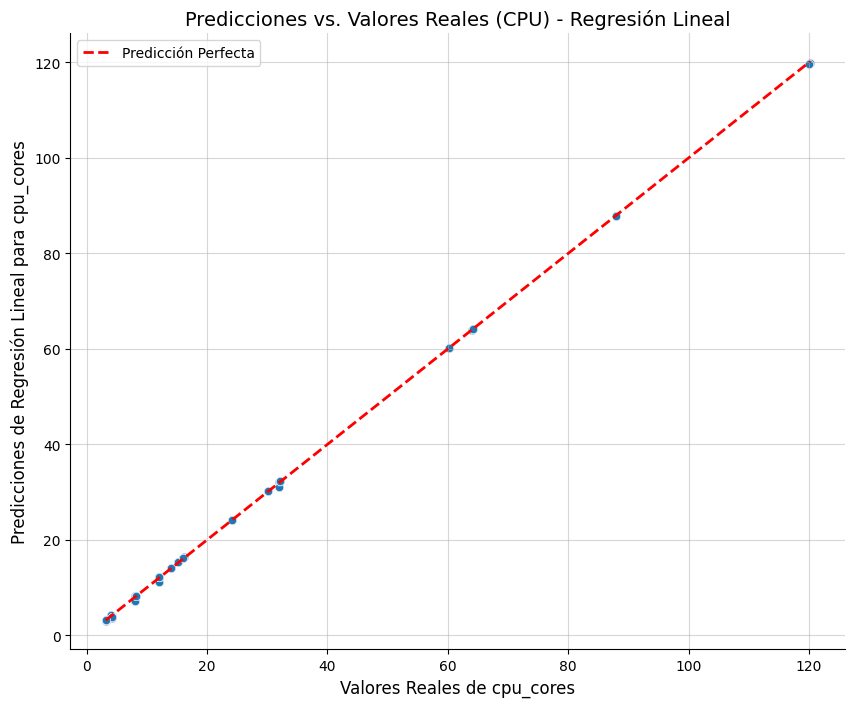

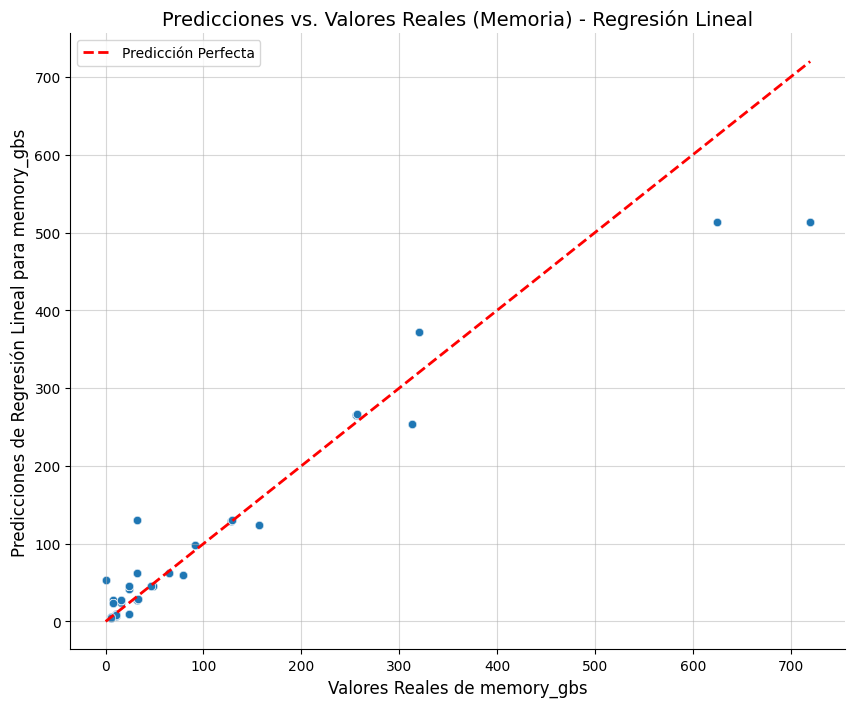

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns  # Para estilos y colores más bonitos

def plot_predictions_vs_actual(y_actual, y_pred, y_label, title, model_name="Modelo"):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_actual, y=y_pred, alpha=0.7)  # Scatter plot con transparencia
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', linewidth=2, label='Predicción Perfecta') # Línea de identidad
    plt.xlabel(f'Valores Reales de {y_label}', fontsize=12)
    plt.ylabel(f'Predicciones de {model_name} para {y_label}', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.5)
    plt.legend(fontsize=10)
    sns.despine()  # Elimina bordes innecesarios del gráfico
    plt.show()


plot_predictions_vs_actual(y_cpu_test, y_cpu_pred, 'cpu_cores', 'Predicciones vs. Valores Reales (CPU) - Regresión Lineal', model_name="Regresión Lineal")
plot_predictions_vs_actual(y_mem_test, y_mem_pred, 'memory_gbs', 'Predicciones vs. Valores Reales (Memoria) - Regresión Lineal', model_name="Regresión Lineal")

## Gráfica de Residuos

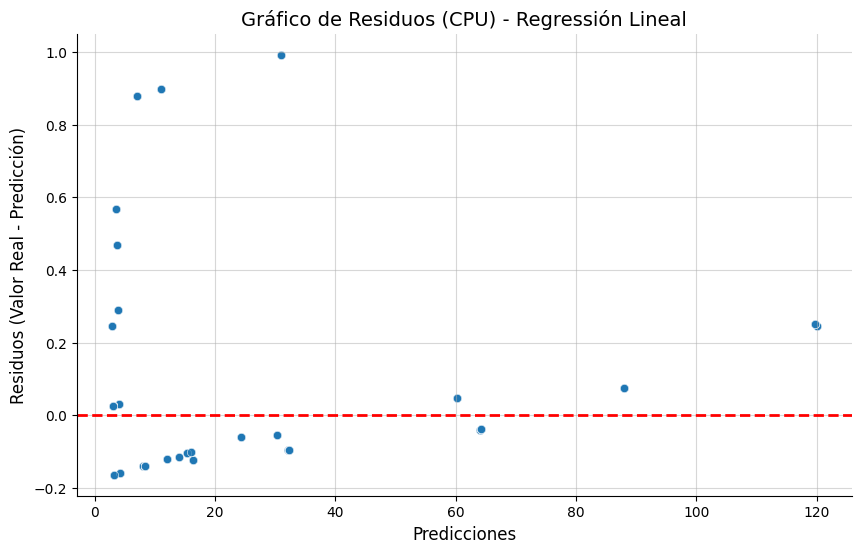

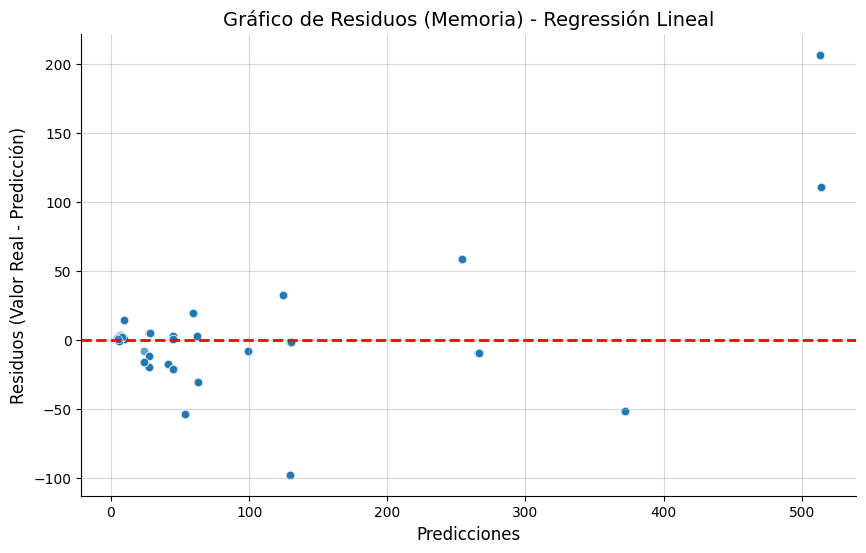

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_residuals(y_actual, y_pred, y_label, title):
    residuals = y_actual - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Línea de error cero
    plt.xlabel('Predicciones', fontsize=12)
    plt.ylabel('Residuos (Valor Real - Predicción)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.5)
    sns.despine()
    plt.show()


plot_residuals(y_cpu_test, y_cpu_pred, 'cpu_cores', 'Gráfico de Residuos (CPU) - Regressión Lineal')
plot_residuals(y_mem_test, y_mem_pred, 'cpu_cores', 'Gráfico de Residuos (Memoria) - Regressión Lineal')